<a href="https://colab.research.google.com/github/Essen-Lin/Performance-Prediction-and-Scheduling-on-Heterogeneous-CPUs/blob/master/MTK_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 學長範例程式 Linear Regression

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import csv

class LinearRegression():

    def __init__(self, learning_rate = 0.1, epochs = 1000, display_step = 100, 
                 n_samples = 50, input_numbers = 2, X = 0, Y = 0):
        # Parameters.
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.display_step = display_step
        self.n_samples = n_samples
        # Number of Input X (PMU counts)
        self.input_numbers = input_numbers

        # self.X = np.random.rand(n_samples,input_numbers).astype(np.float32)
        # self.Y = tf.add(tf.matmul(self.X, np.array([[10],[5]])), 5)
        self.X = X
        self.Y = Y
        self.W = tf.Variable(tf.random.normal([input_numbers,1]))
        self.b = tf.Variable(tf.zeros([1]))

        # Stochastic Gradient Descent Optimizer.
        self.optimizer = tf.optimizers.SGD(self.learning_rate)

    # Linear regression (Wx + b).
    def linear_regression(self, x):
        return tf.add(tf.matmul(x, self.W), self.b)

    # Mean square error.
    def mean_square(self, y_pred, y_true):


        return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / ( self.n_samples)

    # Optimization process. 
    def run_optimization(self):
        # "Forward Propagation"
        # Wrap computation inside a GradientTape for automatic differentiation.
        with tf.GradientTape() as g:
            pred = self.linear_regression(self.X)
            # "Loss Estimation"
            loss = self.mean_square(pred, self.Y)
        
        # "Backward Propagation"
        # Compute gradients.
        gradients = g.gradient(loss, [self.W, self.b])
        # Update W and b following gradients.
        self.optimizer.apply_gradients(zip(gradients, [self.W, self.b]))

    def run(self):
        # Run training for the given number of steps.
        for step in range(1, self.epochs + 1):
            # Run the optimization to update W and b values.
            self.run_optimization()
            
            if step % self.display_step == 0:
                pred = self.linear_regression(self.X)
                loss = self.mean_square(pred, self.Y)

                print("step: %i, loss: %.10f," % (step, loss) ,"W:", self.W.numpy().ravel(), ", b:", self.b.numpy())

# with open('test2.csv', newline='') as csvfile:
#     rows = csv.DictReader(csvfile)
#     frequency = []
#     count = []
#     time = []

#     for row in rows:
#         if row['event'] == 'raw-br-immed-spec':
#             print(row)
#             frequency.append(float(row['frequency']))
#             count.append(float(row['count'].replace(',','')))
#             time.append(float(row['time']))

#     # Normalization
#     layer = tf.keras.layers.Normalization(axis=None)
#     layer.adapt(frequency)
#     frequency = layer(frequency)
#     layer.adapt(count)
#     count = layer(count)
#     X = tf.transpose([frequency, count])
#     #X = tf.transpose([frequency,count])

#     #layer.adapt(time)
#     #Y = tf.transpose([layer(time)])
#     Y = tf.transpose([time])
#     print(X)
#     print(Y)

#     LinearRegression(X=X, Y=Y, n_samples =6, input_numbers = 2, epochs = 1000).run()


with open('/content/benchmard_data/test2.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    frequency = []
    count = []
    time = []

    for row in rows:
        if row['setup core'] == '0' and row['frequency'] == '300000':
            #print(row)
            count.append(float(row['count'].replace(',','')))
            time.append(float(row['time']))

    # Normalization
    layer = tf.keras.layers.Normalization(axis=None)
    layer.adapt(count)
    count = layer(count)
    X = tf.Variable([count])

    Y=tf.reduce_mean(time)
    print(X)
    print(Y)

    LinearRegression(X=X, Y=Y, n_samples =1, input_numbers = 150, epochs = 100, display_step = 10).run()

<tf.Variable 'Variable:0' shape=(1, 150) dtype=float32, numpy=
array([[-0.27509272,  0.593458  ,  0.593458  , -0.18049043, -0.25471213,
        -0.25470576,  0.7819588 ,  0.7830196 , -0.18020207, -0.18020207,
        -0.26729858, -0.27509278, -0.27509278, -0.27509278, -0.27159688,
        -0.27509278, -0.27042815,  3.55789   , -0.27509278, -0.27509278,
         3.5545747 , -0.27509278, -0.27509278,  4.525281  , -0.27509278,
        -0.27509278, -0.27509278, -0.27509278, -0.27509278, -0.27508765,
        -0.27509278, -0.27508765, -0.27509278, -0.27509278, -0.27508765,
        -0.27509278, -0.27509278, -0.27509278, -0.27509278, -0.27509278,
        -0.27509278,  5.83506   ,  5.9345574 , -0.27509278, -0.27509278,
         0.06280483, -0.27509278, -0.27509278, -0.27509278,  0.06065508,
        -0.2743156 , -0.27431494, -0.27509084, -0.27421522, -0.27502322,
        -0.27407086, -0.27509278, -0.27509278, -0.27304316,  0.06265412,
        -0.27509278, -0.27393657, -0.27509278, -0.27509278, -

# Colab 範例程式

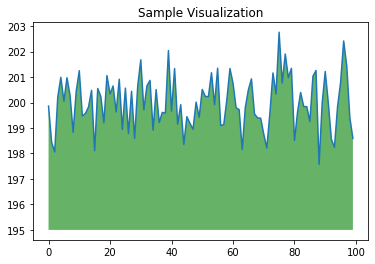

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

# Pixel 4XL - PMU Selection

Using HCA to cluster PMU (HCA : hierarchical cluster analysis)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression


# read test data - Mibench (bitcount)+Lmbench(6)
df_bitcnt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Mibench/bitcnt86400000_4XL.csv')
df_lm_bcopy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_bcopy_4XL.csv')
df_lm_bzero =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_bzero_4XL.csv')
df_lm_cp =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_cp_4XL.csv')
df_lm_fcp =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_fcp_4XL.csv')
df_lm_rd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_rd_4XL.csv')
df_lm_frd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4XL/Lmbench/512m/lmbench_frd_4XL.csv')

df_bitcnt.head(150)

,setup core,runtime core,frequency,coverage,event,count,time
0,0,0,300000,100%,raw-ase-spec,"172,801,437",72.613660
1,0,0,300000,100%,raw-br-immed-retired,"4,070,571,023",72.613660
2,0,0,300000,100%,raw-br-immed-spec,"4,070,571,023",72.613660
3,0,0,300000,100%,raw-br-indirect-spec,"605,610,101",72.613660
4,0,0,300000,100%,raw-br-mis-pred,"47,130,045",72.613660
...,...,...,...,...,...,...,...
145,0,0,300000,100%,raw-unaligned-ld-spec,0,72.647363
146,0,0,300000,100%,raw-unaligned-ldst-retired,"17,060",72.647363
147,0,0,300000,100%,raw-unaligned-ldst-spec,0,72.647363
148,0,0,300000,100%,raw-unaligned-st-spec,0,72.647363


In [ ]:
PMU_list = df_lm_bcopy['event'][0:150]
PMU_num = len(PMU_list)


In [ ]:
from sklearn.metrics import r2_score 
import numpy as np

def convert_float(num):
  b = [float(i.replace(",","")) for i in num]
  # c = [float(i) for i in num] #  convert with for loop
  return b

def append_csv_data(col_name,row_num):
  data =[]
  data.append(df_bitcnt[col_name][row_num])
  data.append(df_lm_bcopy[col_name][row_num])
  data.append(df_lm_bzero[col_name][row_num])
  data.append(df_lm_cp[col_name][row_num])
  data.append(df_lm_fcp[col_name][row_num])
  data.append(df_lm_rd[col_name][row_num])
  data.append(df_lm_frd[col_name][row_num])
  return data

def r(x, y):
    x = np.array(x)
    y = np.array(y)
    xm = x.mean()
    ym = y.mean()
    numerator = np.sum(((x - xm) * (y - ym)))
    denominator = np.sqrt(np.sum((x - xm) ** 2)) * np.sqrt(np.sum((y - ym) ** 2))
    return numerator / denominator 

def generate_PMU_R (cluster,frequency,PMU_list):
    PMU_R = []
    pmu_c = frequency*len(PMU_list)

    for i in range(len(PMU_list)):
      count = (convert_float(append_csv_data('count',i + pmu_c)))
      time = (append_csv_data('time',i + pmu_c))
      PMU_R.append(r(count,time))
    return PMU_R

generate_PMU_R(0,0,PMU_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


[0.9893040424834556,
 0.9869275038122426,
 0.9869275038122426,
 0.9893238403952884,
 0.9923303294042092,
 0.9924975011065652,
 0.9859254358913114,
 0.986213013454184,
 0.9873873171160571,
 0.9873873171160571,
 -0.6323621748876604,
 nan,
 nan,
 nan,
 -0.4637492195940319,
 nan,
 -0.7125640350019282,
 0.9999999439255781,
 -0.6927892811629514,
 nan,
 0.9999999101749466,
 nan,
 nan,
 0.9902522878369211,
 nan,
 -0.712590508433534,
 nan,
 0.9960761340632034,
 nan,
 0.9999930784334972,
 nan,
 -0.6575129014861228,
 nan,
 nan,
 -0.6574879417292099,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9931917701934568,
 0.9931798787648108,
 nan,
 -0.5292551812998458,
 0.5704997968458602,
 nan,
 nan,
 nan,
 0.6032982741070594,
 -0.1721950733396167,
 -0.1472133427962235,
 -0.27423211333985803,
 -0.13432158673513905,
 -0.2217143939733101,
 -0.44004087005301346,
 nan,
 nan,
 -0.30029891969983585,
 0.5539009012089817,
 nan,
 -0.2954043453732923,
 nan,
 nan,
 nan,
 0.9956171300104654,
 nan,
 0.9998434009004186,
 0.9

(1)function 相似度
(2)distance matrix
(3)HCA
(4)Choose PMU
https://eprints.soton.ac.uk/393728/1/mjw-manuscript-2016-05-01.pdf
http://mirlab.org/jang/books/dcpr/dcHierClustering.asp?title=3-2%20Hierarchical%20Clustering%20(%B6%A5%BCh%A6%A1%A4%C0%B8s%AAk)&language=chinese


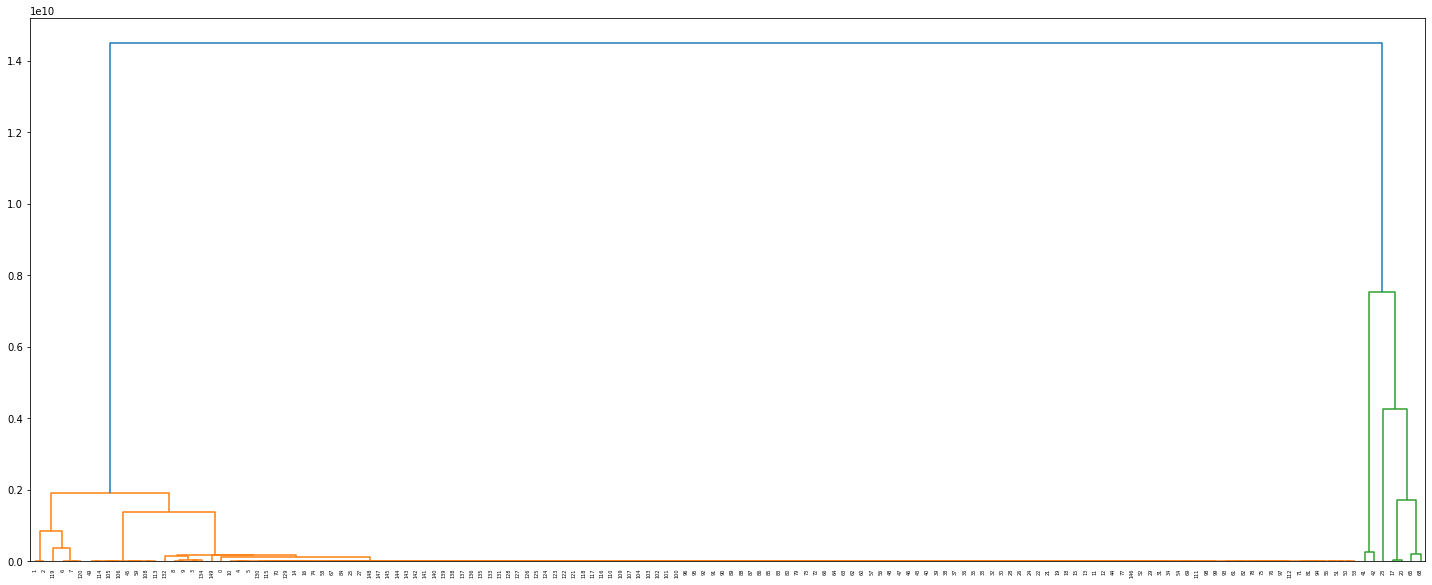

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def generate_pmu_data(cluster,frequency,task):
  data = []
  pmu_num = 150
  row_num = (cluster*3+frequency)*pmu_num

  for i in range(150):
    data.append(task['count'][row_num+i].replace(',',''))
  return data

bitcnt = generate_pmu_data(0,0,df_bitcnt)

X = [[i] for i in bitcnt]
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

將同一個核的3種頻率去做R

In [ ]:
from sklearn.metrics import r2_score 
import numpy as np

def convert_float(num):
  b = [float(i.replace(",","")) for i in num]
  # c = [float(i) for i in num] #  convert with for loop
  return b

def append_csv_data(col_name,row_num):
  data =[]
  data.append(df_bitcnt[col_name][row_num])
  data.append(df_lm_bcopy[col_name][row_num])
  data.append(df_lm_bzero[col_name][row_num])
  data.append(df_lm_cp[col_name][row_num])
  data.append(df_lm_fcp[col_name][row_num])
  data.append(df_lm_rd[col_name][row_num])
  data.append(df_lm_frd[col_name][row_num])
  return data

#cluster = 0 (little)/1(big)/2(prime)
def generate_cnt_time(cluster,pmu):

  count =[]
  time =[]
  if cluster == 0:
    start = pmu
    end = 150*3
  elif cluster == 1:
    start = 150*3+pmu
    end = 150*6
  elif cluster == 2:
    start = 150*6+pmu
    end = len(df_lm_bcopy['count'])
  
  #start = the start point decided by pmu and cluster /len(df_bitcnt['count']) : the length of all data/150: 間隔(total pmu =150)
  for i in range(start,end,150):
    count = count + (append_csv_data('count',i))
    time = time + append_csv_data('time',i)

  result ={"count":convert_float(count),"time":time}
  return result

# print(len(count))
# print(len(time))

# print(count)
# R_square = r2_score(count,time)
# print(R_square)

def generate_PMU_R (cluster,PMU_list):
  PMU_R = []

  for i in range(len(PMU_list)):
    count = generate_cnt_time(cluster,i)['count']
    time = generate_cnt_time(cluster,i)['time']
    PMU_R.append(r(count,time))
  return PMU_R

little = generate_PMU_R(0,PMU_list)
big = generate_PMU_R(1,PMU_list)
prime = generate_PMU_R(2,PMU_list)

def PMU_selection_by_all_freq(cluster_r,r_value,PMU_list):
  PMU_select =[]
  for i in range(len(PMU_list)):
    if abs(cluster_r[i]) >= r_value:
      PMU_select.append(PMU_list[i])

  return PMU_select
  
print("Little PMU:",PMU_selection_by_all_freq(little,0.9,PMU_list))
print("Big PMU:",PMU_selection_by_all_freq(big,0.9,PMU_list))
print("Prime PMU:",PMU_selection_by_all_freq(prime,0.9,PMU_list))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


Little PMU: ['raw-exc-fiq', 'raw-exc-irq', 'raw-l1i-cache-refill']
Big PMU: ['raw-dsb-spec', 'raw-exc-irq', 'raw-exc-trap-fiq', 'raw-l1i-cache-refill', 'raw-l2d-cache-inval', 'raw-l2d-cache-wb-clean']
Prime PMU: ['raw-dsb-spec', 'raw-exc-irq', 'raw-l1i-cache-refill', 'raw-l2d-cache-inval', 'raw-l2d-cache-wb-clean']


Little PMU: ['raw-exc-fiq', 'raw-exc-irq', 'raw-l1i-cache-refill']
Big PMU: ['raw-dsb-spec', 'raw-exc-irq', 'raw-exc-trap-fiq', 'raw-l1i-cache-refill', 'raw-l2d-cache-inval', 'raw-l2d-cache-wb-clean']
Prime PMU: ['raw-dsb-spec', 'raw-exc-irq', 'raw-l1i-cache-refill', 'raw-l2d-cache-inval', 'raw-l2d-cache-wb-clean']